# Exploratory Data Analysis (EDA) of Human Activity Recognition (HAR) datasets
In this notebook, we will investigate and combine two HAR datasets: the HARTH and HAR70+ datasets.

**Table of Contents**

0. [Dataset Information](#0-dataset-information)
    1. [HARTH Dataset](#01-harth-dataset)
    2. [HAR70+ Dataset](#02-har70-dataset)
1. [Setup](#1-setup)
2. [Examine Dataset](#2-examine-dataset)
    1. [Examine Timestamps](#21-examine-timestamps)
    2. [Handling Discrepancy](#22-handling-discrepancy)
    3. [Examine Labels (Classes)](#23-examine-labels-classes)
    4. [Descriptive Statistics](#24-descriptive-statistics)
    5. [Missing Values](#25-missing-values)

## 0. Dataset Information

### 0.1. HARTH Dataset

The Human Activity Recognition Trondheim (HARTH) dataset can be found [here](https://archive.ics.uci.edu/dataset/779/harth). The HARTH dataset contains sensor data from 22 participants wearing two 3-axial accelerometers (attached to the right thigh and lower back) for around 2 hours in a free-living setting.

*The following information is taken **verbatim** from the HARTH dataset [webpage](https://archive.ics.uci.edu/dataset/779/harth).*

**For what purpose was the dataset created?**

The dataset was created to train machine learning classifiers for human activity recognition based on professional annotations of activities in a free-living setting.

**Who funded the creation of the dataset?**

NTNU Helse

**Additional Information**

The HARTH dataset contains recordings of 22 participants wearing two 3-axial Axivity AX3 accelerometers for around 2 hours in a free-living setting. One sensor was attached to the right front thigh and the other to the lower back. The provided sampling rate is 50Hz. Video recordings of a chest-mounted camera were used to annotate the performed activities frame-by-frame.

Each subject's recordings are provided in a separate .csv file. One such .csv file contains the following columns:
1. `timestamp`: date and time of recorded sample
2. `back_x`: acceleration of back sensor in $x$-direction (down) in the unit $g$
3. `back_y`: acceleration of back sensor in $y$-direction (left) in the unit $g$
4. `back_z`: acceleration of back sensor in $z$-direction (forward) in the unit $g$
5. `thigh_x`: acceleration of thigh sensor in $x$-direction (down) in the unit $g$
6. `thigh_y`: acceleration of thigh sensor in $y$-direction (right) in the unit $g$
7. `thigh_z`: acceleration of thigh sensor in $z$-direction (backward) in the unit $g$
8. `label`: annotated activity code

The dataset contains the following **annotated activities** with the corresponding coding scheme:
- (1) Walking
- (2) Running	
- (3) Shuffling
- (4) Stairs (ascending)	
- (5) Stairs (descending)	
- (6) Standing	
- (7) Sitting	
- (8) Lying
- (13) Cycling (sit)
- (14) Cycling (stand) 
- (130) Cycling (sit, inactive)
- (140): Cycling (stand, inactive)

**[Corresponding Paper](https://www.semanticscholar.org/paper/HARTH%3A-A-Human-Activity-Recognition-Dataset-for-Logacjov-Bach/dad0184602231aa82d4ed8c438cf0c18efba3e0e)**

[1] A. Logacjov, K. Bach, A. Kongsvold, H. B. Bårdstu, and P. J. Mork, “HARTH: A Human Activity Recognition Dataset for Machine Learning,” Sensors, vol. 21, no. 23, Art. no. 23, Jan. 2021, doi: 10.3390/s21237853.

[2] K. Bach et al., “A Machine Learning Classifier for Detection of Physical Activity Types and Postures During Free-Living,” Journal for the Measurement of Physical Behaviour, vol. 1, no. aop, pp. 1–8, Dec. 2021, doi: 10.1123/jmpb.2021-0015.

### 0.2. HAR70+ Dataset

The Human Activity Recognition 70+ (HAR70+) dataset can be found [here](https://archive.ics.uci.edu/dataset/780/har70). The HAR70+ dataset contains sensor data from 18 fit-to-frail older adult subjects (70-95 years old) wearing two 3-axial accelerometers (attached to the right thigh and lower back) for around 40 minutes during a semi-structured free-living protocol.

*The following information is taken **verbatim** from the HAR70+ dataset [webpage](https://archive.ics.uci.edu/dataset/780/har70).*

**For what purpose was the dataset created?**

The purpose was to train machine learning models for human activity recognition on professionally-annotated accelerometer data of fit-to-frail older adults.

**Additional Information**

The HAR70+ dataset contains recordings of 18 older adult participants wearing two 3-axial Axivity AX3 accelerometers for around 40 minutes in a semi-structured free-living setting. The participants' age was between 70 and 95 years. Five of the 18 subjects used walking aids during data recording. One sensor was attached to the right front thigh and the other to the lower back. The provided sampling rate is 50Hz. Video recordings of a chest-mounted camera were used to annotate the performed activities frame-by-frame.

Each subject's recordings are provided in a separate .csv file. One such .csv file contains the following columns:
1. `timestamp`: date and time of recorded sample
2. `back_x`: acceleration of back sensor in $x$-direction (down) in the unit $g$
3. `back_y`: acceleration of back sensor in $y$-direction (left) in the unit $g$
4. `back_z`: acceleration of back sensor in $z$-direction (forward) in the unit $g$
5. `thigh_x`: acceleration of thigh sensor in $x$-direction (down) in the unit $g$
6. `thigh_y`: acceleration of thigh sensor in $y$-direction (right) in the unit $g$
7. `thigh_z`: acceleration of thigh sensor in $z$-direction (backward) in the unit $g$
8. `label`: annotated activity code

The dataset contains the following **annotated activities** with the corresponding coding scheme:
- (1) Walking	
- (3) Shuffling
- (4) Stairs (ascending)	
- (5) Stairs (descending)	
- (6) Standing	
- (7) Sitting	
- (8) Lying

*The HAR70+ dataset follows the annotation scheme of the HARTH dataset. For instance, the value `2` does not appear in any of the class labels in this dataset as none of the participants were recorded running.*

**[Corresponding Paper](https://www.mdpi.com/1424-8220/23/5/2368)**

[1] Ustad, A., Logacjov, A., Trollebø, S.Ø., Thingstad, P., Vereijken, B., Bach, K., Maroni, N.S., 2023. Validation of an Activity Type Recognition Model Classifying Daily Physical Behavior in Older Adults: The HAR70+ Model. Sensors 23, 2368. https://doi.org/10.3390/s23052368

## 1. Setup

In [1]:
# Automatic reloading
%load_ext autoreload
%autoreload 2

In [2]:
####################
# Required Modules #
####################

# Generic/Built-in
import sys 
import os

# Libs
import pandas as pd
import matplotlib.pyplot as plt

The cell below sets up the environment by adding the project’s root directory to the system path and changing the current working directory, enabling imports from the `/src` folder. **This cell should only be ran once per session.**

In [3]:
# Add the project root directory to the system path to enable imports from the '/src' folder.

# Get the project directory 
current_dir = os.path.abspath('') # Current '\notebooks' directory
project_dir = os.path.abspath(os.path.join(current_dir, '..')) # Move up one level to project root directory

# Add the project directory to sys.path
sys.path.append(project_dir)

# Move up to project directory
os.chdir(project_dir)

# Import custom modules
from src.data_preparation import *

In [4]:
# Download HAR70+ dataset and save to 'data' directory
download_har_datasets()

📂 HARTH dataset already downloaded: data\harth.zip
📂 HARTH dataset already extracted in data\harth
📂 HAR70+ dataset already downloaded: data\har70.zip
📂 HAR70+ dataset already extracted in data\har70plus


## 2. Examine Datasets
The HARTH and HAR70+ datasets contain 22 and 18 `csv` files respectively. Each file corresponds to the recorded data for one subject, for a total of 40 subjects. 

Let us examine the data of two subjects, one from each dataset.

In [5]:
# Load S013.csv (HARTH)
df_s013 = pd.read_csv("data/harth/S013.csv")
df_s013.head()

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,2000-01-01 00:00:00.000,-1.503049,-1.051608,0.237058,0.974235,-0.847410,-0.504778,6
1,2000-01-01 00:00:00.020,-0.864992,-0.914792,-0.386545,0.697154,-2.227859,1.101613,6
2,2000-01-01 00:00:00.040,-1.583990,0.037271,-0.710803,0.304346,-1.973903,-1.322303,6
3,2000-01-01 00:00:00.060,-0.648235,-0.042650,-0.380469,-0.547640,-0.858467,-3.763091,6
4,2000-01-01 00:00:00.080,-1.384078,-0.131357,-0.313325,-1.343622,1.377993,-0.188187,6


In [6]:
# Load 501.csv (HAR70+)
df_501 = pd.read_csv("data/har70plus/501.csv")
df_501.head()

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,2021-03-24 14:42:03.839,-0.999023,-0.063477,0.140625,-0.980469,-0.112061,-0.048096,6
1,2021-03-24 14:42:03.859,-0.980225,-0.079346,0.140625,-0.961182,-0.121582,-0.051758,6
2,2021-03-24 14:42:03.880,-0.950195,-0.076416,0.140625,-0.949463,-0.080566,-0.067139,6
3,2021-03-24 14:42:03.900,-0.954834,-0.059082,0.140381,-0.957520,-0.046143,-0.050781,6
4,2021-03-24 14:42:03.920,-0.972412,-0.042969,0.142822,-0.977051,-0.023682,-0.026611,6


### 2.1. Examine Timestamps

Each sample (row) contains the sensor data for one time step.

In [7]:
# Check timestamp format
df_s013['timestamp'].head()

0    2000-01-01 00:00:00.000
1    2000-01-01 00:00:00.020
2    2000-01-01 00:00:00.040
3    2000-01-01 00:00:00.060
4    2000-01-01 00:00:00.080
Name: timestamp, dtype: object

In [8]:
# Convert timestamp to datetime and calculate time differences (between consecutive time steps)
df_s013['timestamp'] = pd.to_datetime(df_s013['timestamp'])
df_s013['timestamp_diff'] = df_s013['timestamp'].diff().dt.total_seconds()

# Summary statistics of timestamp gaps
df_s013['timestamp_diff'].describe()

count    369076.000000
mean          0.020965
std           0.135342
min           0.020000
25%           0.020000
50%           0.020000
75%           0.020000
max          59.620000
Name: timestamp_diff, dtype: float64

In [9]:
# Check timestamp format
df_501['timestamp'].head()

0    2021-03-24 14:42:03.839
1    2021-03-24 14:42:03.859
2    2021-03-24 14:42:03.880
3    2021-03-24 14:42:03.900
4    2021-03-24 14:42:03.920
Name: timestamp, dtype: object

In [10]:
# Convert timestamp to datetime and calculate time differences (between consecutive time steps)
df_501['timestamp'] = pd.to_datetime(df_501['timestamp'])
df_501['timestamp_diff'] = df_501['timestamp'].diff().dt.total_seconds()

# Summary statistics of timestamp gaps
df_501['timestamp_diff'].describe()

count    103859.000000
mean          0.020241
std           0.027083
min           0.019000
25%           0.020000
50%           0.020000
75%           0.020000
max           4.861000
Name: timestamp_diff, dtype: float64

As we can see, the average time interval between consecutive time steps is 0.02 seconds (20 milliseconds), which aligns with the reported **50Hz sampling rate** for both datasets (1/50 = 0.02 seconds).

However, there are occasional larger time gaps (up to 59.62 and 4.861 seconds for `S013.csv` and `501.csv` respectively). This is likely due to pauses in recording or missing data.

When constructing sequences of time steps for our time series dataset using a sliding window approach (slide window across time steps), we must account for discontinuities in the time series. Specifically, the sliding window cannot move across 'breakpoints' - points where the time gap between consecutive steps significantly exceeds the expected 0.02 seconds. These gaps indicate interruptions in data collection, and allowing the window to extend past them would create sequences that falsely assume temporal continuity.

We can identify these breakpoints like so:

In [11]:
# Identify breakpoints (where gaps are larger than expected 0.02s)
gap_threshold = 0.05  # Slightly higher than 0.02 to account for minor variations
breakpoints = df_s013[df_s013['timestamp_diff'] > gap_threshold].index

# Print breakpoints
print(f"Identified {len(breakpoints)} breakpoints at indices:", breakpoints.tolist())

Identified 54 breakpoints at indices: [772, 856, 1170, 1500, 2104, 6090, 52548, 56888, 57650, 59156, 59500, 87040, 90538, 92026, 109222, 109560, 109566, 109578, 120702, 143224, 160842, 175758, 175906, 176446, 176576, 176692, 177122, 177726, 178292, 180548, 182032, 183400, 183496, 253498, 253706, 253766, 254154, 254342, 254398, 254430, 255006, 256312, 261370, 261780, 272874, 305448, 307134, 319696, 326862, 362192, 362660, 363792, 365274, 365686]


Let's examine the breakpoint at index 772:

In [12]:
df_s013["timestamp"].iloc[770: 775]

770   2000-01-01 00:00:15.400
771   2000-01-01 00:00:15.420
772   2000-01-01 00:00:28.080
773   2000-01-01 00:00:28.100
774   2000-01-01 00:00:28.120
Name: timestamp, dtype: datetime64[ns]

As we can see, there is a large gap between time step 771 and 772. When constructing our sequences later, we will ensure that no sequence contains BOTH time step 771 and 772.

### 2.2. Handling Discrepancy

After reviewing all files, we identified one discrepancy: unlike every other subject, `S006.csv` contains data recorded at a 100Hz sampling rate, meaning there is only a 0.01 second gap between consecutive time steps.

In [13]:
df_s006 = pd.read_csv("data/harth/S006.csv")
df_s006['timestamp'].head()

0    2019-01-12 00:00:00.000
1    2019-01-12 00:00:00.010
2    2019-01-12 00:00:00.020
3    2019-01-12 00:00:00.030
4    2019-01-12 00:00:00.040
Name: timestamp, dtype: object

In [14]:
# Convert timestamp to datetime and calculate time differences (between consecutive time steps)
df_s006['timestamp'] = pd.to_datetime(df_s006['timestamp'])
df_s006['timestamp_diff'] = df_s006['timestamp'].diff().dt.total_seconds()

# Summary statistics of timestamp gaps
df_s006['timestamp_diff'].describe()

count    408708.000000
mean          0.010210
std           0.034594
min           0.010000
25%           0.010000
50%           0.010000
75%           0.010000
max          17.690000
Name: timestamp_diff, dtype: float64

The HARTH paper notes that some subjects were originally recorded at 100Hz and subsequently downsampled to 50Hz. However, it appears that for `S006.csv`, the dataset creators mistakenly left the data **undownsampled**. This inconsistency is also present in version 1.0 of the HARTH GitHub repository.

Although newer versions seem to have addressed this issue, the authors recommend using version 1.0 for reproducibility. Furthermore, the copy we obtained from the UCI repository contains the same discrepancy. Therefore, we will manually downsample `S006.csv` to ensure consistency across the dataset, using our `downsample_s006_data` function.

In [15]:
df_s006 = pd.read_csv("data/harth/S006.csv")
df_s006_downsampled = downsample_s006_data(df_s006)
df_s006_downsampled.head()

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,2019-01-12 00:00:00.000,-0.760242,0.299570,0.468570,-5.092732,-0.298644,0.709439,6
1,2019-01-12 00:00:00.020,-1.170922,0.186353,-0.167010,-0.035442,-0.078423,-0.515212,6
2,2019-01-12 00:00:00.040,-0.355071,-0.051831,-0.113419,-0.547471,0.140903,-0.653782,6
3,2019-01-12 00:00:00.060,-1.187088,-0.005508,0.056683,-0.520771,0.154755,-0.232140,6
4,2019-01-12 00:00:00.080,-0.841369,0.129879,0.122489,-0.954652,-0.293586,-0.184660,6


### 2.3. Examine Labels (Classes)

In [16]:
# See sample labels
df_s013["label"].value_counts().sort_index()

label
1       34548
2        3494
3       37316
4        3440
5        2846
6       53591
7      223424
8        7554
13       2764
130       100
Name: count, dtype: int64

In [17]:
# See sample labels
df_501["label"].value_counts().sort_index()

label
1    62872
3     1876
4       92
5      504
6    14376
7    14562
8     9578
Name: count, dtype: int64

Two observations:
- There is a significant **class imbalance**.
- The coding scheme being used is **inappropriate** for PyTorch usage, which requires labels to be integers in the range `[0, num_classes - 1]`.

**Note:** The HARTH dataset UCI repository page refers to the last two labels (index 130 and 140) as "Cycling (sit, inactive)" and "Cycling (stand, inactive)", which is somewhat confusing, as "inactive cycling" is contradictory. In the HARTH paper however, the last two labels are instead referred to as "Transport (sitting)" and "Transport (standing)", defining them as the activity of sitting or standing in a bus, car, or train (refer to Appendix A). We will adopt this more intuitive label naming convention. 

**Original** activity coding scheme:
- (1) Walking
- (2) Running	
- (3) Shuffling
- (4) Stairs (ascending)	
- (5) Stairs (descending)	
- (6) Standing	
- (7) Sitting	
- (8) Lying
- (13) Cycling (sit)
- (14) Cycling (stand) 
- (130) *Transport (sit)*
- (140): *Transport (stand)*

We will use the `load_har_subject_data` function to load the `csv` files of all 40 subjects into dataframe objects (`pd.DataFrame`). Additionally, this function will:
- Manually downsample `S006.csv` for us (as we did above)
- Remap the class labels to a PyTorch appropriate scheme, using the map: `{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 13: 8, 14: 9, 130: 10, 140: 11}`

This will result in a **new** activity coding scheme:
- (0) Walking
- (1) Running	
- (2) Shuffling
- (3) Stairs (ascending)	
- (4) Stairs (descending)	
- (5) Standing	
- (6) Sitting	
- (7) Lying
- (8) Cycling (sit)
- (9) Cycling (stand) 
- (10) Transport (sit)
- (11): Transport (stand)


In [18]:
subject_dfs = load_har_subject_data()

✅ Successfully loaded recorded data of subjects from HARTH and HAR70+ datasets.


To examine the data across all 40 subjects, we will combine the datasets together.

*Note: `S023.csv` has an unnamed column (just an indexing) while `S021.csv` has an extra `index` (not sure what this is for). These are not needed and will be discarded.*

In [19]:
df = pd.concat(list(subject_dfs.values()), ignore_index=True, join="inner")
df.head()

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,2019-01-12 00:00:00.000,-0.760242,0.299570,0.468570,-5.092732,-0.298644,0.709439,5
1,2019-01-12 00:00:00.020,-1.170922,0.186353,-0.167010,-0.035442,-0.078423,-0.515212,5
2,2019-01-12 00:00:00.040,-0.355071,-0.051831,-0.113419,-0.547471,0.140903,-0.653782,5
3,2019-01-12 00:00:00.060,-1.187088,-0.005508,0.056683,-0.520771,0.154755,-0.232140,5
4,2019-01-12 00:00:00.080,-0.841369,0.129879,0.122489,-0.954652,-0.293586,-0.184660,5


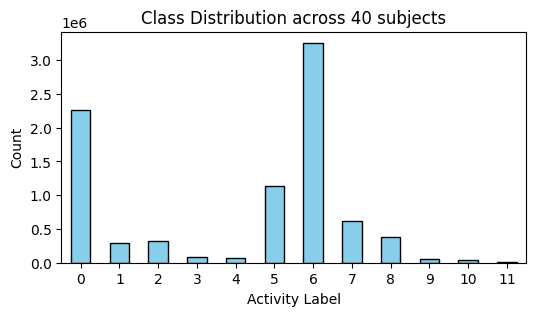

label
0     2264023
1      291356
2      314553
3       80092
4       71456
5     1130195
6     3259642
7      625562
8      381444
9       54249
10      36139
11       7865
Name: count, dtype: int64

In [20]:
label_counts = df["label"].value_counts().sort_index()

plt.figure(figsize=(6, 3))
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Activity Label")
plt.ylabel("Count")
plt.title("Class Distribution across 40 subjects")
plt.xticks(rotation=0)
plt.show()
label_counts

Across all 40 subjects, we can see there is a major class imbalance across all time steps. Actions like sitting (6), walking (0), and standing (5) are overrepresented and the many actions are underrepresented.

### 2.4. Descriptive Statistics

In [21]:
df.describe()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
count,8.516576e+06,8.516576e+06,8.516576e+06,8.516576e+06,8.516576e+06,8.516576e+06,8.516576e+06
mean,-8.829589e-01,-1.884468e-02,-1.156947e-01,-6.227566e-01,1.313510e-02,1.677083e-01,4.112218e+00
std,3.547998e-01,2.140823e-01,3.906977e-01,6.100587e-01,3.645787e-01,7.631934e-01,2.846832e+00
min,-8.000000e+00,-4.307617e+00,-6.574463e+00,-8.000000e+00,-7.997314e+00,-8.000000e+00,0.000000e+00
25%,-1.000488e+00,-9.301747e-02,-3.381514e-01,-9.807130e-01,-1.101070e-01,-2.761230e-01,0.000000e+00
50%,-9.685060e-01,-9.239504e-04,-1.264650e-01,-5.187213e-01,1.855500e-02,8.327713e-02,6.000000e+00
75%,-8.232420e-01,6.474272e-02,7.259147e-02,-1.562500e-01,1.439597e-01,9.206627e-01,6.000000e+00
max,2.291708e+00,6.491943e+00,4.909483e+00,7.999756e+00,7.999756e+00,8.406235e+00,1.100000e+01


### 2.5. Missing Values

In [22]:
# Check for missing values
df.isnull().sum()

timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64

There are no missing values in the dataset.

In [23]:
# Testing 
df_train, df_val, df_test = split_har_subject_data(subject_dfs)

In [24]:
train_dataset = HARDataset(df_train)

In [25]:
train_dataset[3]

(tensor([[-0.9739,  0.0620, -0.3596, -0.9547, -0.0350, -0.3025],
         [-0.9664,  0.0629, -0.3591, -0.9558, -0.0329, -0.3025],
         [-0.9705,  0.0621, -0.3597, -0.9643, -0.0349, -0.3025],
         ...,
         [-0.9763,  0.1079, -0.3723, -0.9019, -0.0291, -0.4458],
         [-0.9849,  0.1116, -0.3794, -0.9152, -0.0343, -0.4230],
         [-0.9907,  0.1009, -0.3587, -0.9339, -0.0352, -0.3943]]),
 tensor(5))